In [1]:
from __future__ import print_function
__author__= 'ys'

import pylab as pl
import matplotlib.pyplot as plt
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize

import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

## and which mean to give it

In [3]:
mymean = 100

In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

### Making a dictionary to host the distributions.

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


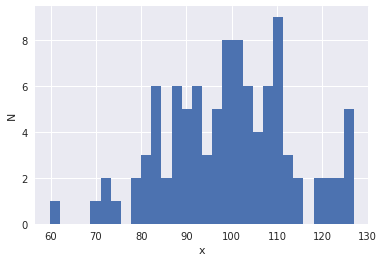

In [5]:
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.42, standard deviation: 13.91


## Now let's do it for 100 Chisq distributions

we want distributions of different sizes (all integers between 10 and 2000)

In [7]:
# mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print(mysize, mysize.shape)

[ 96 845 817 341 881 812 722 213 198 615 976 975 131 282 415 711 544 583
 624 859 153 440 998 204 838 934 606 693 410 847 988 746 105 357 381 615
 786 397 831 591 720 819 868 495 323 726 250 130  51  24 578 712 394 942
 471 914 711 937 109 630 351 322 314 113 393 370 276 948 689 831 565 105
 192 486 926 691 449 446 258  40 279 827 432 125 946 778 979 496 855 907
 154 965 664 678  86 680 628 236  72 400] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


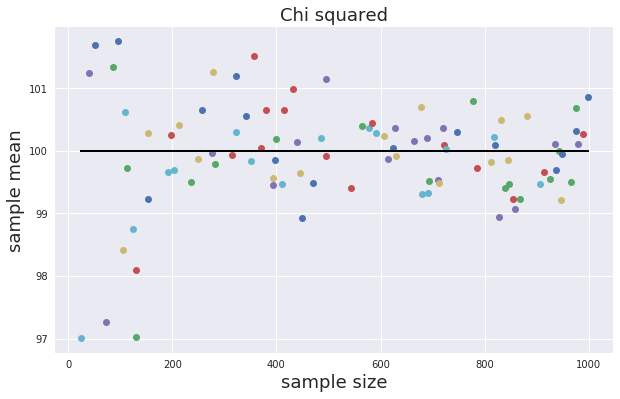

In [8]:
# Overwriting the dictionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: When the sample size increases and more and more sample added, means of each different samples tend toward a normal distribution (draw a bell curve gathering in the middle)

# now the histogram of the mean of all samples:

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


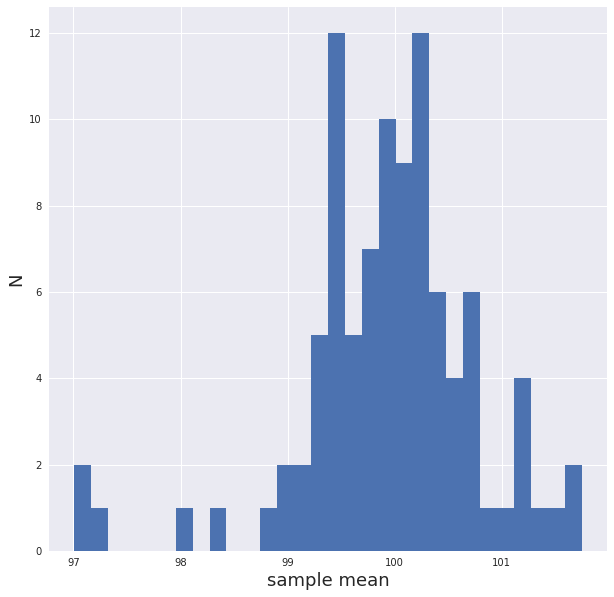

In [9]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: Histogram view of each different sample's means. Indeed, they look like a bell curve

## Normal Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


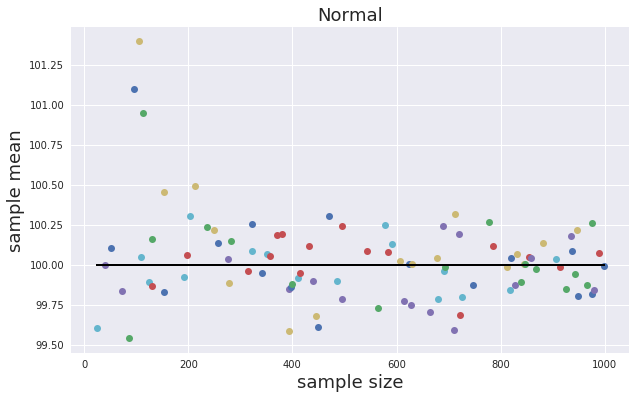

In [10]:
md['normal'] = {} 
mu = 100
sigma = 5

for n in mysize:
    md['normal'][n] = np.random.normal(mu, sigma, size = n)
    
# save the means for plotting later    

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [mu, mu], 'k')

### Figure 4: Again, means of each different samples tend toward a normal distribution (draw a bell curve gathering in the middle). And, here it's more obvious because each distribution is already normal.

## Poisson Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


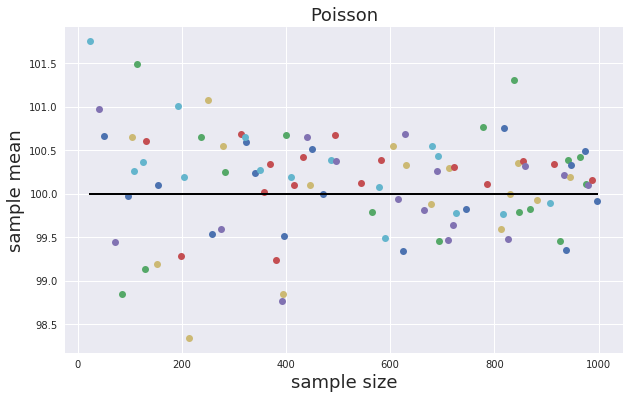

In [11]:
md['poisson'] = {} 
lam = df

for n in mysize:
    md['poisson'][n] = np.random.poisson(lam, size = n)
    
# save the means for plotting later    

md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 5: When we take the lam value as 100, we get a similar picture that we had with chi-squared. However, samples' means are more sparse this time.

## Binomial Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


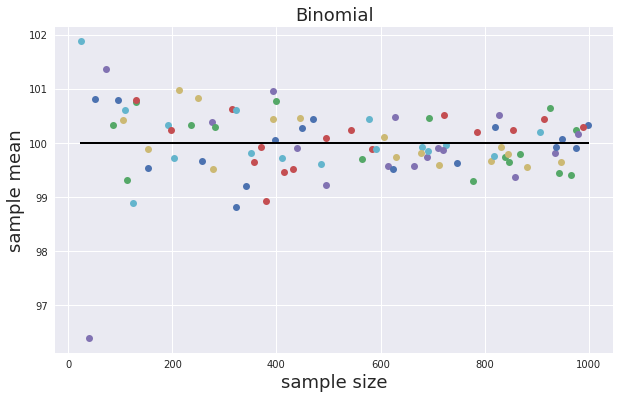

In [12]:
md['binomial'] = {} 
m = 1000
p = 0.1

for n in mysize:
    md['binomial'][n] = np.random.binomial(m, p, size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Binomial', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [m*p, m*p], 'k')

### Figure 6: Because we choose '10' for number of trials and '0.7' for the probability of success, means have converged to '7'. Nonetheless, we see the same the similar bell curve when we run for 100 different samples. 

## Lognormal Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


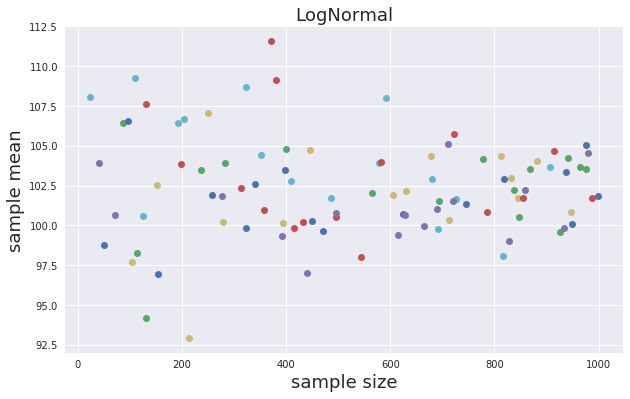

In [19]:
md['lognormal'] = {} 
mu = 4.5
sigma = 0.5

for n in mysize:
    md['lognormal'][n] = np.random.lognormal(mu, sigma, size = n)
    
# save the means for plotting later    

md['lognormal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lognormal']:
    if not type(nn) == str:
        md['lognormal']['means'][nn] = md['lognormal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['lognormal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('LogNormal', fontsize=18)
        #axnormal_mu_n.plot([min(mysize), max(mysize)], [mu, mu], 'k')

### Figure 7: Altough we have taken 'mu' parameter as '0', means are not gathered around '0'. Rather, they are between 1.6 - 1.8, because this is a lognormal distribution, and '0'(mean) and '1'(std) are not the values for lognormal, but of the underlying normal distribution.

# now the histogram of the mean of all samples all together with 5 distributions:

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


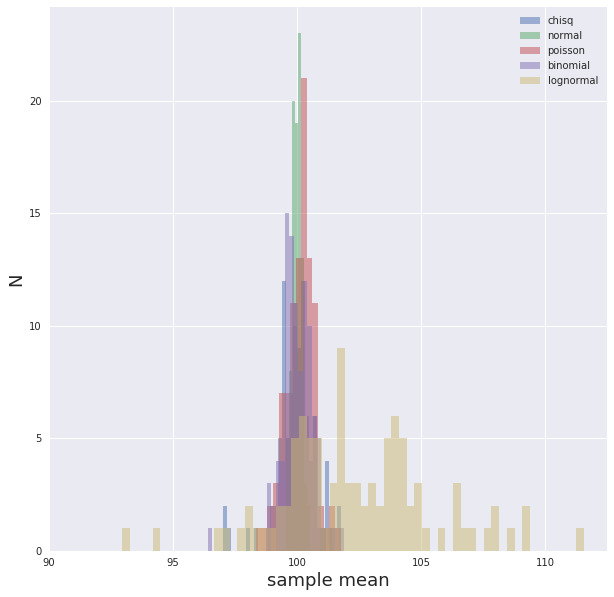

In [20]:
allmeans1 = list(md['chisq']['means'].values())
allmeans2 = list(md['normal']['means'].values())
allmeans3 = list(md['poisson']['means'].values())
allmeans4 = list(md['binomial']['means'].values())
allmeans5 = list(md['lognormal']['means'].values())


pl.figure(figsize=(10, 10))
hist1=pl.hist(allmeans1, alpha=0.5, bins=30, label='chisq')
hist2=pl.hist(allmeans2, alpha=0.5, bins=15, label='normal')
hist3=pl.hist(allmeans3, alpha=0.5, bins=15, label='poisson')
hist4=pl.hist(allmeans4, alpha=0.5, bins=30, label='binomial')
hist5=pl.hist(allmeans5, alpha=0.5, bins=60, label='lognormal')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc='upper right')
pl.xticks([90, 95, 100, 105, 110])
pl.show()

### Figure 8: Histogram view of five different distributions. They all converge near mean of 100(except lognormal) and look like a bell curve.